In [1]:
import numpy as np
from PIL import Image
from perlin_noise import PerlinNoise
import matplotlib.pyplot as plt

In [2]:
import ipywidgets as widgets
from ipywidgets import interact

In [3]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [4]:
%matplotlib notebook

In [21]:
#purple
from colour import Color
first = Color("#0f0417")
second = Color("#2d1455")
dist = 66
third = Color("#640f9c")
colors1 = list(first.range_to(second, dist))
colors2 = list(second.range_to(third, 100-dist))
colors = colors1 + colors2

In [12]:
#lava
from colour import Color
first = Color("#dd9f0d")
second = Color("#d9671a")
dist = 22
third = Color("#871818")
colors1 = list(first.range_to(second, dist))
colors2 = list(second.range_to(third, 100-dist))
colors = colors1 + colors2

In [8]:
#water
from colour import Color
first = Color("#1537a2")
second = Color("#1679aa")
dist = 67
third = Color("#bad1e8")
colors1 = list(first.range_to(second, dist))
colors2 = list(second.range_to(third, 100-dist))
colors = colors1 + colors2
colors = list(first.range_to(third, 100))

<IPython.core.display.Javascript object>


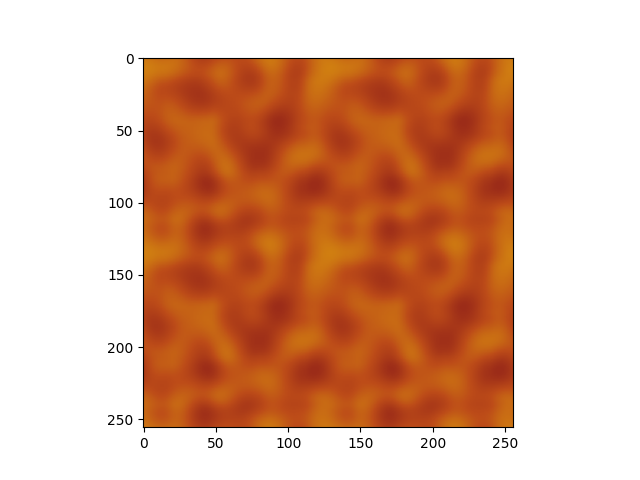

In [6]:
from PIL.ImageOps import colorize, grayscale
fig, ax = plt.subplots()

purple1 = (15,4,23) #0f0417
purple2 = (38,16,71) #261047
purple3 = (100, 15, 156) #640f9c

lava1 = (221,159,13) #dd9f0d
lava2 = (189,76,25) #bd4c19
lava3 = (135,24,24) #871818

water1 = (21,55,162) #1537a2
water2 = (77,151,191) #4d97bf
water3 = (186,209,232) #bad1e8

imgdatas = []
frames = 64
tile = 2
fps = 60
for i in range(frames):
    with Image.open(f"./imgs/img{i}.png") as im:
        im = colorize(grayscale(im), lava1, lava3, lava2)
        arr = np.asarray(im)
        arr = np.tile(arr, (tile,tile,1))
        imgdatas.append(arr)

def get_frame(f):
    return imgdatas[f]

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(len(imgdatas)):
    im = ax.imshow(get_frame(i), animated=True)
    if i == 0:
        ax.imshow(get_frame(i))  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=1000/fps, blit=True,
                                repeat_delay=0)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()